In [200]:
from commonfunctions import *
import cv2
import skimage.filters as filters
import scipy.ndimage as nd
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


0.32971696001838235


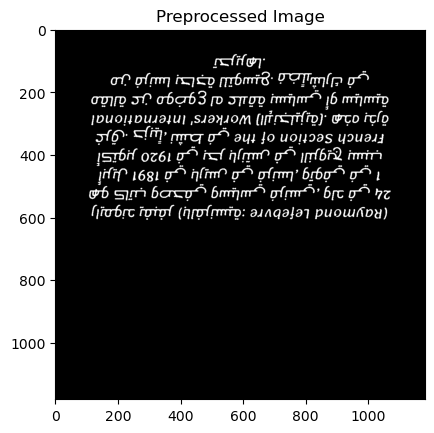

In [205]:
img = io.imread('fonts-dataset/189.jpeg')
img = filters.median(img)
img = rgb2gray(img)
# Apply median filter to remove salt and pepper noise
# convert to binary image
thresh = filters.threshold_otsu(img)
print(thresh)
img = img < thresh
img = img.astype(int)
# get all non black Pixels
cntNotBlack = cv2.countNonZero(img)

# get pixel count of image
height, width = img.shape
cntPixels = height*width

# compute all black pixels
cntBlack = cntPixels - cntNotBlack
# Ensure the image is white text on Black background because black pixels should be more than white pixels
if cntBlack < cntNotBlack:
    img = cv2.bitwise_not(img)
show_images([img], ['Preprocessed Image'])

# Output the preprocessed image
# io.imsave('preprocessed.png', img)

#### Note to joseph: After analysis I found that the angle shifting falls only in one of these values [0, 45, 90, 135, 180] so I commented the np.arange line as it consumed ~10 seconds per image

In [206]:
arr1 = np.array([1,2,3,4,5])
print(arr1[1:])
print(arr1[:-1])

[2 3 4 5]
[1 2 3 4]


Best angle: 0


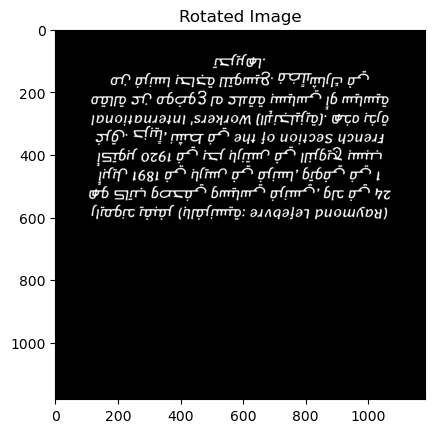

In [207]:
def find_score(arr, angle):
    data = nd.rotate(arr, angle, reshape=False, order=0)
    hist = np.sum(data, axis=1)
    # score is the sum of squares of differences of every two consecutive elements in the histogram (variance could also be used)
    score = np.sum((hist[1:] - hist[:-1]) ** 2)
    return hist, score


# angles = np.arange(0, 181, 1)

angles = [0, 45, 90, 135, 180] # TODO 180 might be removed later
scores = []

for angle in angles:
    hist, score = find_score(img, angle)
    # print('Angle: {}, Score: {}'.format(angle, score))
    scores.append(score)

best_score = max(scores)
best_angle = angles[scores.index(best_score)]
print('Best angle: {}'.format(best_angle)) # correct skew
rotated = nd.rotate(img, best_angle, order=0)
show_images([rotated], ['Rotated Image'])


(1181, 1)


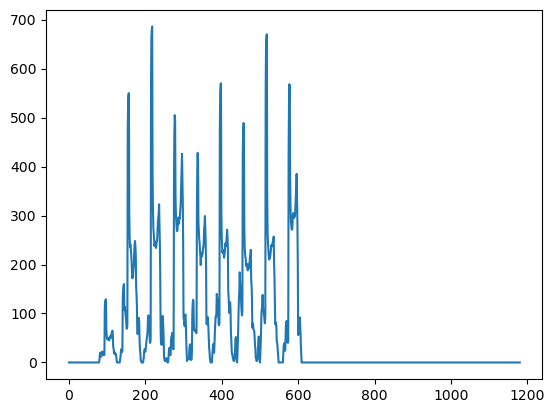

In [208]:
vertical_hist = np.sum(img,axis=0,keepdims=True)
horizontal_hist = np.sum(img,axis=1,keepdims=True)
print(horizontal_hist.shape)
# plot vertical_hist to see the peaks
plt.plot(horizontal_hist.T[0])